## Capstone Project - The Battle of Neighborhoods

### Table of Contents

1. Introduction
2. Obtain Data
3. Analysis
4. Conclusion

### 1. Introduction

The goal of this project is to find an optimal location for a new mexican restaurant in New York City, and suggest the location of this restaurant to the stakeholders.
The following factors will have an effect on our decision:
1. the number of the same type restaurants nearby;
2. the population of the neighborhood where the new restaurant located.

Following data soureces will be needed to generate the required information:
1. New York City population density by borough;
2. the number of mexican restaurants and their location in each neighborhood through Foursquare API;
3. population of each neighborhood in Manhattan.

### 2. Obtain Data

First, let's import libriaries and download the neighborhoods data.

In [1]:
import requests 
import pandas as pd
import numpy as np 
import random 

!pip install geopy
from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium

import json

!pip install lxml
import lxml

print('Libraries imported.')

     |████████████████████████████████| 112kB 7.4MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.3.0               |     pyhd3deb0d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         1

Download New York City population density data from Wikipedia website.

In [3]:
newyork_data=pd.read_html('https://en.wikipedia.org/wiki/Boroughs_of_New_York_City')

In [4]:
ny_borough=newyork_data[0]

In [5]:
ny_borough

New York City's five boroughsvte  \
                                        Jurisdiction   
                                             Borough   
0                                          The Bronx   
1                                           Brooklyn   
2                                          Manhattan   
3                                             Queens   
4                                      Staten Island   
5                                   City of New York   
6                                  State of New York   
7  Sources:[3][4][5] and see individual borough a...   

                                                      \
                                                       
                                              County   
0                                              Bronx   
1                                              Kings   
2                                           New York   
3                                             Queens   
4                                           Richmond   
5                                   City of New York   
6                                  State of New York   
7  Sources:[3][4][5] and see individual borough a...   

                                                      \
                                          Population   
                                     Estimate (2019)   
0                                            1418207   
1                                            2559903   
2                                            1628706   
3                                            2253858   
4                                             476143   
5                                            8336817   
6                                           19453561   
7  Sources:[3][4][5] and see individual borough a...   

                                                      \
                              Gross Domestic Product   
                                  billions(2012 US$)   
0                                             42.695   
1                                             91.559   
2                                            600.244   
3                                             93.310   
4                                             14.514   
5                                            842.343   
6                                           1731.910   
7  Sources:[3][4][5] and see individual borough a...   

                                                      \
                                                       
                                     per capita(US$)   
0                                              30100   
1                                              35800   
2                                             368500   
3                                              41400   
4                                              30500   
5                                             101000   
6                                              89000   
7  Sources:[3][4][5] and see individual borough a...   

                                                      \
                                           Land area   
                                        square miles   
0                                              42.10   
1                                              70.82   
2                                              22.83   
3                                             108.53   
4                                              58.37   
5                                             302.64   
6                                           47126.40   
7  Sources:[3][4][5] and see individual borough a...   

                                                      \
                                                       
                                            squarekm   
0                                             109.04   
1                                             183.42   
2                                     

In [6]:
ny_borough.drop(index=[5,6,7])

New York City's five boroughsvte                            \
                      Jurisdiction                Population   
                           Borough    County Estimate (2019)   
0                        The Bronx     Bronx         1418207   
1                         Brooklyn     Kings         2559903   
2                        Manhattan  New York         1628706   
3                           Queens    Queens         2253858   
4                    Staten Island  Richmond          476143   

                                                                             \
  Gross Domestic Product                    Land area               Density   
      billions(2012 US$) per capita(US$) square miles squarekm persons /mi2   
0                 42.695           30100        42.10   109.04        33867   
1                 91.559           35800        70.82   183.42        36147   
2                600.244          368500        22.83    59.13        71341   
3                 93.310           41400       108.53   281.09        20767   
4                 14.514           30500        58.37   151.18         8157   

                
                
  persons /km2  
0        13006  
1        13957  
2        27544  
3         8018  
4         3150

The ny_borough dataframe above shows that Manhattan is the most densely populated of the five boroughs of New York City. Higher population density is one of the most important keys for restaurant business. More people means more potential customers. So let's focus our attention to Manhattan and find the best location in this borough for the planned Mexican restaurant.

Since we've identified the candidate borough, the next step is to find out all neighborhoods in this borough.

In [7]:
# download new york city dataset
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [8]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [9]:
neighborhoods_data = newyork_data['features']

In [10]:
# check the dataset
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [11]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)

In [12]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [13]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [14]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Find out all the neighborhoods in Manhattan.

In [16]:
neighborhoods_manhattan=neighborhoods[neighborhoods['Borough']=='Manhattan'].reset_index(drop=True)
neighborhoods_manhattan.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [17]:
neighborhoods_manhattan.shape

(40, 4)

In [18]:
print('Manhattan has {} neighborhoods.'.format(
       neighborhoods_manhattan.shape[0]
    )
)

Manhattan has 40 neighborhoods.


Use Foursquare API to explore each neighborhod in the dataframe. Generate the information of mexican restaurants in each neighborhood of Manhattan.

In [19]:
# @hidden_cell
# Define Foursquare Credentials and Version
CLIENT_ID = 'KGZTRJD04OA2QCPB2DNSKESWL5H3PKYJMHV3QPNDCJL2COWO' 
CLIENT_SECRET = 'QZQVOME0LH04IAKXTBA2NSCN2NZK20JP1NMLZ1N3SVGNXRD3'
VERSION = '20200101'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KGZTRJD04OA2QCPB2DNSKESWL5H3PKYJMHV3QPNDCJL2COWO
CLIENT_SECRET:QZQVOME0LH04IAKXTBA2NSCN2NZK20JP1NMLZ1N3SVGNXRD3


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT=100
    query='Mexican'
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            query,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    

In [21]:
manhattan_venues = getNearbyVenues(names=neighborhoods_manhattan['Neighborhood'],
                                   latitudes=neighborhoods_manhattan['Latitude'],
                                   longitudes=neighborhoods_manhattan['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [22]:
manhattan_venues.shape

(553, 7)

In [23]:
manhattan_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Marble Hill              40.876551              -73.910660   
1  Marble Hill              40.876551              -73.910660   
2    Chinatown              40.715618              -73.994279   
3    Chinatown              40.715618              -73.994279   
4    Chinatown              40.715618              -73.994279   

                 Venue  Venue Latitude  Venue Longitude      Venue Category  
0  Taqueria Sinaloense       40.874574       -73.910687  Mexican Restaurant  
1            Guacamole       40.874511       -73.910708  Mexican Restaurant  
2         Barrio Chino       40.718069       -73.989975  Mexican Restaurant  
3        Factory Tamal       40.715876       -73.990467  Mexican Restaurant  
4            Pulquería       40.714421       -73.998185  Mexican Restaurant

In [24]:
manhattan_venues['Venue Category'].unique()

array(['Mexican Restaurant', 'Burger Joint', 'Taco Place', 'Café',
       'Cocktail Bar', 'Mediterranean Restaurant', 'American Restaurant',
       'Tex-Mex Restaurant', 'Restaurant', 'New American Restaurant',
       'Burrito Place', 'Breakfast Spot', 'Coffee Shop', 'Food Truck',
       'Sports Bar', 'Dive Bar', 'Vegetarian / Vegan Restaurant',
       'Theme Restaurant', 'Japanese Restaurant', 'Sandwich Place',
       'Arepa Restaurant', 'Lounge', 'Empanada Restaurant', 'Bar',
       'Tapas Restaurant', 'Speakeasy', 'Bakery', 'Asian Restaurant',
       'Seafood Restaurant', 'Latin American Restaurant',
       'Fast Food Restaurant', 'Gastropub', 'French Restaurant',
       'Wings Joint', 'Diner', 'Dessert Shop', 'Cheese Shop',
       'Whisky Bar'], dtype=object)

In [25]:
manhattan_venues[manhattan_venues['Venue Category']== 'Taco Place'] # this cell is used to check certain venue category to see if it's mexican style

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
9             Chinatown              40.715618              -73.994279   
13            Chinatown              40.715618              -73.994279   
25   Washington Heights              40.851903              -73.936900   
35               Inwood              40.867684              -73.921210   
65          East Harlem              40.792249              -73.944182   
..                  ...                    ...                     ...   
529            Flatiron              40.739673              -73.990947   
539            Flatiron              40.739673              -73.990947   
546            Flatiron              40.739673              -73.990947   
549            Flatiron              40.739673              -73.990947   
550            Flatiron              40.739673              -73.990947   

                                                 Venue  Venue Latitude  \
9                                LES Crêpes & Taqueria       40.715535   
13                                        Taco Recipes       40.715387   
25                                           Taco GoGo       40.848933   
35                                     Taqueria Emilio       40.866338   
65                                      Sidewalk Tacos       40.792928   
..                                                 ...             ...   
529  Flats Fix Taqueria (Flats Fix Taco & Tequila Bar)       40.736686   
539                                        Taco Cabana       40.742889   
546                                            Mexique       40.738761   
549                                 Brothers Taco Cart       40.739846   
550                               Delaney BBQ Tacotown       40.742874   

     Venue Longitude Venue Category  
9         -73.989890     Taco Place  
13        -73.989864     Taco Place  
25        -73.933573     Taco Place  
35        -73.920219     Taco Place  
65        -73.940424     Taco Place  
..               ...            ...  
529       -73.991045     Taco Place  
539       -73.993225     Taco Place  
546       -73.991689     Taco Place  
549       -73.995543     Taco Place  
550       -73.988951     Taco Place  

[75 rows x 7 columns]

Check the above venue category. Some venue categories are not mexican type, such as 'Mediterranean Restaurant'. We need to select the right categories from them, and create a list.

In [26]:
venues_list=['Mexican Restaurant','Taco Place', 'Burrito Place','Tex-Mex Restaurant', 'Food Truck','Latin American Restaurant','Fast Food Restaurant','Deli / Bodega']

In [27]:
manhattan_venues=manhattan_venues[manhattan_venues['Venue Category'].isin (venues_list)]

In [28]:
manhattan_venues.shape

(474, 7)

In [29]:
print('The totle number of mexican restaurants in Manhattan is',manhattan_venues.shape[0])

The totle number of mexican restaurants in Manhattan is 474


By filtering the venue category, we downsize the totle number of mexican restaurants in our dataframe from 634 to 554. 
Now we have the totle number of mexican restaurants in Manhattan. Next, we will list the number of mexican restaurants in each neighborhood in Manhattan.

In [30]:
neighborhood_venues=pd.DataFrame(manhattan_venues['Neighborhood'].value_counts()).reset_index()
neighborhood_venues.columns=['Neighborhood','Number of Restaurants']
neighborhood_venues.head()

Neighborhood  Number of Restaurants
0                Noho                     34
1             Midtown                     26
2            Flatiron                     25
3  Financial District                     24
4         East Harlem                     20

In [31]:
neighborhood_venues.shape

(39, 2)

Add neighborhoods latitude and longitude into the dataframe.

In [32]:
coor=manhattan_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']].drop_duplicates()
coor.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude
0          Marble Hill              40.876551              -73.910660
2            Chinatown              40.715618              -73.994279
15  Washington Heights              40.851903              -73.936900
26              Inwood              40.867684              -73.921210
36    Hamilton Heights              40.823604              -73.949688

In [33]:
coor.shape

(39, 3)

In [34]:
neighborhood_venues=pd.merge(neighborhood_venues,coor,on='Neighborhood')    
neighborhood_venues.head()

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0                Noho                     34              40.723259   
1             Midtown                     26              40.754691   
2            Flatiron                     25              40.739673   
3  Financial District                     24              40.707107   
4         East Harlem                     20              40.792249   

   Neighborhood Longitude  
0              -73.988434  
1              -73.981669  
2              -73.990947  
3              -74.010665  
4              -73.944182

In [35]:
neighborhood_venues.shape

(39, 4)

Scrape population of neighborhood table of website.

In [36]:
pp=pd.read_html('https://www.worldatlas.com/articles/manhattan-neighborhoods-by-population.html')

In [37]:
pp[0].head()

Rank    ﻿Neighborhood  Population
0     1          Midtown      391371
1     2  Lower Manhattan      382654
2     3           Harlem      335109
3     4  Upper East Side      229688
4     5  Upper West Side      209084

In [38]:
ppl=pp[0].drop(columns=['Rank'])
ppl.columns=['Neighborhood','Population']
ppl.head()

Neighborhood  Population
0          Midtown      391371
1  Lower Manhattan      382654
2           Harlem      335109
3  Upper East Side      229688
4  Upper West Side      209084

To merge dataframe neighborhood_venues and ppl based on the column of 'Neighborhood', we need to convert the column value to lower case.

In [39]:
neighborhood_venues['Neighborhood']=neighborhood_venues['Neighborhood'].str.lower()
neighborhood_venues.head()

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0                noho                     34              40.723259   
1             midtown                     26              40.754691   
2            flatiron                     25              40.739673   
3  financial district                     24              40.707107   
4         east harlem                     20              40.792249   

   Neighborhood Longitude  
0              -73.988434  
1              -73.981669  
2              -73.990947  
3              -74.010665  
4              -73.944182

In [40]:
ppl['Neighborhood']=ppl['Neighborhood'].str.lower()
ppl.head()

Neighborhood  Population
0          midtown      391371
1  lower manhattan      382654
2           harlem      335109
3  upper east side      229688
4  upper west side      209084

In [41]:
neighborhood_rest=pd.merge(neighborhood_venues,ppl,how='outer',on='Neighborhood')
neighborhood_rest.head()

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0                noho                   34.0              40.723259   
1             midtown                   26.0              40.754691   
2            flatiron                   25.0              40.739673   
3  financial district                   24.0              40.707107   
4         east harlem                   20.0              40.792249   

   Neighborhood Longitude  Population  
0              -73.988434     24846.0  
1              -73.981669    391371.0  
2              -73.990947         NaN  
3              -74.010665     60976.0  
4              -73.944182    115921.0

Go through the dataframe, clean data, delete duplicate rows.

In [42]:
mask1=neighborhood_rest[neighborhood_rest['Neighborhood']=='flatiron district']
datavalue1=mask1.iloc[0,2]

In [43]:
neighborhood_rest.loc[neighborhood_rest['Neighborhood']=='flatiron','Population']=datavalue1

In [44]:
mask2=neighborhood_rest[neighborhood_rest['Neighborhood']=='lower manhattan']
datavalue2=mask2.iloc[0,2]

In [45]:
neighborhood_rest.loc[neighborhood_rest['Neighborhood']=='lower east side','Population']=datavalue2

In [46]:
mask3=neighborhood_rest[neighborhood_rest['Neighborhood']=='clinton']
datavalue3=mask3.iloc[0,2]

In [47]:
neighborhood_rest.loc[neighborhood_rest['Neighborhood']=="hell's kitchen",'Population']=datavalue3

In [48]:
mask4=neighborhood_rest[neighborhood_rest['Neighborhood']=='central harlem']
datavalue4=mask4.iloc[0,2]

In [49]:
neighborhood_rest.loc[neighborhood_rest['Neighborhood']=='harlem','Population']=datavalue4

In [50]:
mask5=neighborhood_rest[neighborhood_rest['Neighborhood']=='gramercy']
datavalue5=mask5.iloc[0,2]

In [51]:
neighborhood_rest.loc[neighborhood_rest['Neighborhood']=='gramercy park','Population']=datavalue5

In [52]:
# this cell is used to check whether a certain neighborhood is in the dataframe
neighborhood_rest.loc[neighborhood_rest['Neighborhood'].str.contains('korea')]

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
47    koreatown                    NaN                    NaN   

    Neighborhood Longitude  Population  
47                     NaN     20000.0

In [53]:
neighborhood_rest=neighborhood_rest[~neighborhood_rest['Neighborhood'].isin
                                    (['flatiron district','lower manhattan','west village','clinton',
                                     'midtown south','carnegie hill','lower manhattan','central harlem',
                                     'alphabet city','gramercy'])]
neighborhood_rest

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0                   noho                   34.0              40.723259   
1                midtown                   26.0              40.754691   
2               flatiron                   25.0              40.739673   
3     financial district                   24.0              40.707107   
4            east harlem                   20.0              40.792249   
5      greenwich village                   20.0              40.726933   
6            murray hill                   19.0              40.748303   
7           east village                   19.0              40.727847   
9                chelsea                   18.0              40.744035   
10          civic center                   16.0              40.715229   
13                  soho                   14.0              40.722184   
14      hamilton heights                   14.0              40.823604   
16          sutton place                   13.0              40.760280   
18          little italy                   11.0              40.719324   
19             chinatown                   11.0              40.715618   
20    washington heights                   11.0              40.851903   
21      manhattan valley                   11.0              40.797307   
22                inwood                   10.0              40.867684   
23             yorkville                    9.0              40.775930   
24            turtle bay                    9.0              40.752042   
25            tudor city                    8.0              40.746917   
26        lincoln square                    8.0              40.773529   
27            lenox hill                    7.0              40.768113   
28     battery park city                    6.0              40.711932   
29        manhattanville                    5.0              40.816934   
30       upper west side                    5.0              40.787658   
31               tribeca                    5.0              40.721522   
32       upper east side                    4.0              40.775639   
33   morningside heights                    4.0              40.808000   
34       lower east side                    4.0              40.717807   
36           marble hill                    2.0              40.876551   
37          hudson yards                    2.0              40.756658   
38       stuyvesant town                    1.0              40.731000   
40                harlem                    NaN                    NaN   
41    lower east village                    NaN                    NaN   
43        hell's kitchen                    NaN                    NaN   
44        hudson heights                    NaN                    NaN   
45           two bridges                    NaN                    NaN   
46         gramercy park                    NaN                    NaN   
47             koreatown                    NaN                    NaN   
49                nolita                    NaN                    NaN   
50              kips bay                    NaN                    NaN   
51  meatpacking district                    NaN                    NaN   

    Neighborhood Longitude     Population  
0               -73.988434   24846.000000  
1               -73.981669  391371.000000  
2               -73.990947            NaN  
3               -74.010665   60976.000000  
4               -73.944182  115921.000000  
5               -73.999914   22785.000000  
6               -73.978332   10284.000000  
7               -73.982226   62832.000000  
9               -74.003116   38242.000000  
10              -74.005415            NaN  
13              -74.000657   19573.000000  
14              -73.949688   48520.000000  
16              -73.963556            NaN  
18              -73.997305    1211.000000  
19              -73.994279  100000.000000  
20              -73.936900  158318.000000  
21     

Data cleaning done!

### 3. Analysis

Add a column named 'Restaurant Density' to the dataframe. In this column, the lower value means this neighborhood has few mexican restaurants, so it has higher potential to open a new mexican restaurant.

In [54]:
neighborhood_rest['Restaurant Density']=neighborhood_rest['Number of Restaurants']/neighborhood_rest['Population']
neighborhood_rest.head()

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0                noho                   34.0              40.723259   
1             midtown                   26.0              40.754691   
2            flatiron                   25.0              40.739673   
3  financial district                   24.0              40.707107   
4         east harlem                   20.0              40.792249   

   Neighborhood Longitude  Population  Restaurant Density  
0              -73.988434     24846.0            0.001368  
1              -73.981669    391371.0            0.000066  
2              -73.990947         NaN                 NaN  
3              -74.010665     60976.0            0.000394  
4              -73.944182    115921.0            0.000173

In [55]:
neighborhood_rest=neighborhood_rest.sort_values(by='Restaurant Density').reset_index(drop=True)

In [56]:
neighborhood_rest

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0        upper east side                    4.0              40.775639   
1        upper west side                    5.0              40.787658   
2        stuyvesant town                    1.0              40.731000   
3                midtown                   26.0              40.754691   
4     washington heights                   11.0              40.851903   
5    morningside heights                    4.0              40.808000   
6              chinatown                   11.0              40.715618   
7         lincoln square                    8.0              40.773529   
8      battery park city                    6.0              40.711932   
9            east harlem                   20.0              40.792249   
10           marble hill                    2.0              40.876551   
11                inwood                   10.0              40.867684   
12             yorkville                    9.0              40.775930   
13               tribeca                    5.0              40.721522   
14      hamilton heights                   14.0              40.823604   
15          east village                   19.0              40.727847   
16    financial district                   24.0              40.707107   
17               chelsea                   18.0              40.744035   
18                  soho                   14.0              40.722184   
19     greenwich village                   20.0              40.726933   
20                  noho                   34.0              40.723259   
21           murray hill                   19.0              40.748303   
22          little italy                   11.0              40.719324   
23              flatiron                   25.0              40.739673   
24          civic center                   16.0              40.715229   
25          sutton place                   13.0              40.760280   
26      manhattan valley                   11.0              40.797307   
27            turtle bay                    9.0              40.752042   
28            tudor city                    8.0              40.746917   
29            lenox hill                    7.0              40.768113   
30        manhattanville                    5.0              40.816934   
31       lower east side                    4.0              40.717807   
32          hudson yards                    2.0              40.756658   
33                harlem                    NaN                    NaN   
34    lower east village                    NaN                    NaN   
35        hell's kitchen                    NaN                    NaN   
36        hudson heights                    NaN                    NaN   
37           two bridges                    NaN                    NaN   
38         gramercy park                    NaN                    NaN   
39             koreatown                    NaN                    NaN   
40                nolita                    NaN                    NaN   
41              kips bay                    NaN                    NaN   
42  meatpacking district                    NaN                    NaN   

    Neighborhood Longitude     Population  Restaurant Density  
0               -73.960508  229688.000000            0.000017  
1               -73.977059  209084.000000            0.000024  
2               -73.974052   21049.000000            0.000048  
3               -73.981669  391371.000000            0.000066  
4               -73.936900  158318.000000            0.000069  
5               -73.963896   55929.000000            0.000072  
6               -73.994279  100000.000000            0.000110  
7               -73.985338   61489.000000            0.000130  
8               -74.016869   39699.000000            0.000151  
9               -73.944182  115921.000000            0.000173  
10              -73.910660    9481.000000          

Import folium, and create Manhattan map.

In [57]:
manhattan_geo = r'https://data.beta.nyc/dataset/0ff93d2d-90ba-457c-9f7e-39e47bf2ac5f/resource/35dd04fb-81b3-479b-a074-a27a37888ce7/download/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson' # geojson file

# create a plain map
manhattan_map = folium.Map(location=[40.7831,-73.9712], zoom_start=12)
manhattan_map

In [58]:
neighborhood_rest['Neighborhood']=neighborhood_rest['Neighborhood'].str.title()

In [59]:
neighborhood_rest['Neighborhood'].replace({'Noho':'NoHo','Soho':'SoHo',"Hell'S Kitchen":"Hell's Kitchen"},inplace=True)

In [60]:
neighborhood_rest['Restaurant Density']=neighborhood_rest['Restaurant Density']*100000

In [61]:
neighborhood_rest

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0        Upper East Side                    4.0              40.775639   
1        Upper West Side                    5.0              40.787658   
2        Stuyvesant Town                    1.0              40.731000   
3                Midtown                   26.0              40.754691   
4     Washington Heights                   11.0              40.851903   
5    Morningside Heights                    4.0              40.808000   
6              Chinatown                   11.0              40.715618   
7         Lincoln Square                    8.0              40.773529   
8      Battery Park City                    6.0              40.711932   
9            East Harlem                   20.0              40.792249   
10           Marble Hill                    2.0              40.876551   
11                Inwood                   10.0              40.867684   
12             Yorkville                    9.0              40.775930   
13               Tribeca                    5.0              40.721522   
14      Hamilton Heights                   14.0              40.823604   
15          East Village                   19.0              40.727847   
16    Financial District                   24.0              40.707107   
17               Chelsea                   18.0              40.744035   
18                  SoHo                   14.0              40.722184   
19     Greenwich Village                   20.0              40.726933   
20                  NoHo                   34.0              40.723259   
21           Murray Hill                   19.0              40.748303   
22          Little Italy                   11.0              40.719324   
23              Flatiron                   25.0              40.739673   
24          Civic Center                   16.0              40.715229   
25          Sutton Place                   13.0              40.760280   
26      Manhattan Valley                   11.0              40.797307   
27            Turtle Bay                    9.0              40.752042   
28            Tudor City                    8.0              40.746917   
29            Lenox Hill                    7.0              40.768113   
30        Manhattanville                    5.0              40.816934   
31       Lower East Side                    4.0              40.717807   
32          Hudson Yards                    2.0              40.756658   
33                Harlem                    NaN                    NaN   
34    Lower East Village                    NaN                    NaN   
35        Hell's Kitchen                    NaN                    NaN   
36        Hudson Heights                    NaN                    NaN   
37           Two Bridges                    NaN                    NaN   
38         Gramercy Park                    NaN                    NaN   
39             Koreatown                    NaN                    NaN   
40                Nolita                    NaN                    NaN   
41              Kips Bay                    NaN                    NaN   
42  Meatpacking District                    NaN                    NaN   

    Neighborhood Longitude     Population  Restaurant Density  
0               -73.960508  229688.000000            1.741493  
1               -73.977059  209084.000000            2.391383  
2               -73.974052   21049.000000            4.750820  
3               -73.981669  391371.000000            6.643313  
4               -73.936900  158318.000000            6.948041  
5               -73.963896   55929.000000            7.151925  
6               -73.994279  100000.000000           11.000000  
7               -73.985338   61489.000000           13.010457  
8               -74.016869   39699.000000           15.113731  
9               -73.944182  115921.000000           17.253129  
10              -73.910660    9481.000000          

In [62]:
threshold_scale = np.linspace(neighborhood_rest['Restaurant Density'].min(),
                              neighborhood_rest['Restaurant Density'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

# generate choropleth map 
manhattan_map.choropleth(
    geo_data=manhattan_geo,
    data=neighborhood_rest,
    columns=['Neighborhood', 'Restaurant Density'],
    key_on='feature.properties.neighborhood',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mexican Restaurant Density in Manhattan'
)

manhattan_map

From the map above we can get a clearly look at the Mexican restaurants density in Manhattan. The darker the color is, the higher density the neighborhood has. And the light color neighborhoods are the potential locations we open a new restaurant.

Let's list the top 5 neighborhoods in Manhattan that have the lowest restaurant density.

In [63]:
result_neighborhood=neighborhood_rest.head(5)
result_neighborhood

Neighborhood  Number of Restaurants  Neighborhood Latitude  \
0     Upper East Side                    4.0              40.775639   
1     Upper West Side                    5.0              40.787658   
2     Stuyvesant Town                    1.0              40.731000   
3             Midtown                   26.0              40.754691   
4  Washington Heights                   11.0              40.851903   

   Neighborhood Longitude  Population  Restaurant Density  
0              -73.960508    229688.0            1.741493  
1              -73.977059    209084.0            2.391383  
2              -73.974052     21049.0            4.750820  
3              -73.981669    391371.0            6.643313  
4              -73.936900    158318.0            6.948041

In [64]:
manhattan_geo = r'https://data.beta.nyc/dataset/0ff93d2d-90ba-457c-9f7e-39e47bf2ac5f/resource/35dd04fb-81b3-479b-a074-a27a37888ce7/download/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson' # geojson file

manhattan_map = folium.Map(location=[40.7831,-73.9712], zoom_start=12)

In [65]:
manhattan_map.choropleth(
    geo_data=manhattan_geo,
    data=result_neighborhood,
    columns=['Neighborhood', 'Restaurant Density'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mexican Restaurant Density in Manhattan'
)

manhattan_map

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt

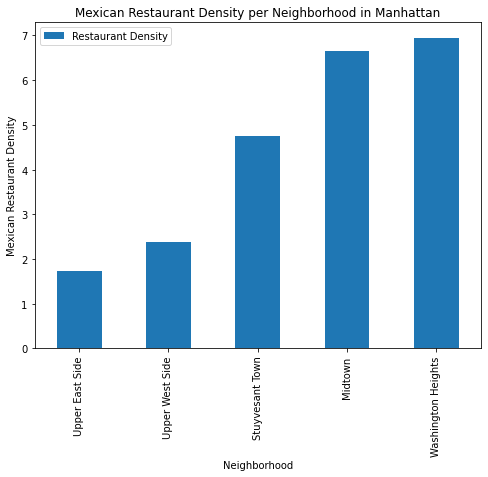

In [67]:
result_neighborhood[['Neighborhood', 'Restaurant Density']].plot(kind='bar',figsize=(8,6))
plt.xlabel('Neighborhood')
plt.ylabel('Mexican Restaurant Density')
plt.title('Mexican Restaurant Density per Neighborhood in Manhattan')
plt.xticks(range(0, 5), result_neighborhood['Neighborhood'].tolist())
plt.show()